### Geospatial data plotting with Python

#### COORDINATES FORMAT:

Coordinates can be expressed in different formats:

* Decimal degrees (DD): 41.40338, 2.17403
* Degrees, minutes, and seconds (DMS): 41°24'12.2"N 2°10'26.5"E
* Degrees and decimal minutes (DMM): 41 24.2028, 2 10.4418

The examples below make use of the 1st format in the list

#### [Tutorial HERE](https://github.com/DerwenAI/ibm_dsc_articles/blob/master/2020_05/tutorial.ipynb)

In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
pd.set_option("float_format", "{:.2f}".format)

%matplotlib inline

In [3]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77926, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.7222, -75.75323 39.7579..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [4]:
state_pop = pd.read_csv("nst-est2018-alldata.csv").iloc[5:,:]
state_pop.head(7)

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,DEATHS2017,DEATHS2018,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,NATURALINC2017,NATURALINC2018,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,INTERNATIONALMIG2017,INTERNATIONALMIG2018,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,DOMESTICMIG2017,DOMESTICMIG2018,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,NETMIG2017,NETMIG2018,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016,RESIDUAL2017,RESIDUAL2018,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RBIRTH2017,RBIRTH2018,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RDEATH2018,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
5,40,3,6,1,Alabama,4779736,4780138,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,5310,13386,16730,14896,12021,10679,11585,10375,12751,14227,59689,59070,57936,58907,59637,59388,58259,57216,11073,48818,48364,50847,49692,51820,51662,53033,53425,3154,10871,10706,7089,9215,7817,7726,5226,3791,928,4716,5874,5111,3753,4685,5950,3190,3344,1238,-2239,59,2641,-755,-1553,-1977,2065,5718,2166,2477,5933,7752,2998,3132,3973,5255,9062,-10,38,91,55,-192,-270,-114,-106,-102,12.46,12.29,12.01,12.18,12.30,12.22,11.96,11.72,10.19,10.06,10.54,10.27,10.69,10.63,10.89,10.94,2.27,2.23,1.47,1.91,1.61,1.59,1.07,0.78,0.98,1.22,1.06,0.78,0.97,1.22,0.66,0.69,-0.47,0.01,0.55,-0.16,-0.32,-0.41,0.42,1.17,0.52,1.23,1.61,0.62,0.65,0.82,1.08,1.86
6,40,4,9,2,Alaska,710231,710249,713906,722038,730399,737045,736307,737547,741504,739786,737438,3657,8132,8361,6646,-738,1240,3957,-1718,-2348,2893,11702,11123,11342,11446,11335,11247,10981,10693,924,3936,3935,4046,4035,4354,4441,4586,4738,1969,7766,7188,7296,7411,6981,6806,6395,5955,433,1320,2361,2881,1213,2306,2282,2595,2401,1162,-979,-1274,-3544,-9593,-8178,-5175,-10746,-10752,1595,341,1087,-663,-8380,-5872,-2893,-8151,-8351,93,25,86,13,231,131,44,38,48,16.30,15.32,15.46,15.54,15.38,15.21,14.83,14.48,5.48,5.42,5.51,5.48,5.91,6.01,6.19,6.41,10.82,9.90,9.94,10.06,9.47,9.20,8.63,8.06,1.84,3.25,3.93,1.65,3.13,3.09,3.50,3.25,-1.36,-1.75,-4.83,-13.02,-11.10,-7.00,-14.51,-14.56,0.47,1.50,-0.90,-11.38,-7.97,-3.91,-11.01,-11.31
7,40,4,8,4,Arizona,6392017,6392288,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,15486,65723,83132,78370,98841,99756,111856,103424,122770,20942,86103,85580,86100,86124,86765,84965,83743,83550,11484,48157,48746,50590,50236,52850,56023,57680,58806,9458,37946,36834,35510,35888,33915,28942,26063,24744,2709,17126,15779,18681,22020,20235,20865,14248,14335,3496,10583,30078,23960,40464,45315,61949,62930,83240,6205,27709,45857,42641,62484,65550,82814,77178,97575,-177,68,441,219,469,291,100,183,451,13.37,13.14,13.05,12.88,12.79,12.33,11.97,11.75,7.48,7.48,7.67,7.52,7.79,8.13,8

In [5]:
pop_states = usa.merge( state_pop, left_on='NAME', right_on='NAME')
pop_states.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,SUMLEV,REGION,DIVISION,STATE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,DEATHS2017,DEATHS2018,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,NATURALINC2017,NATURALINC2018,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,INTERNATIONALMIG2017,INTERNATIONALMIG2018,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,DOMESTICMIG2017,DOMESTICMIG2018,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,NETMIG2017,NETMIG2018,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016,RESIDUAL2017,RESIDUAL2018,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RBIRTH2017,RBIRTH2018,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RDEATH2018,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",40,3,5,24,5773552,5773798,5788642,5838991,5887072,5923704,5958165,5986717,6004692,6024891,6042718,14844,50349,48081,36632,34461,28552,17975,20199,17827,18454,73542,72720,72362,72756,74158,73387,72138,71029,10628,43674,43461,45736,44735,47160,47239,50555,51184,7826,29868,29259,26626,28021,26998,26148,21583,19845,6590,20726,25760,21406,23397,27566,21569,22756,22575,841,208,-6323,-10919,-16504,-25680,-29676,-24011,-24518,7431,20934,19437,10487,6893,1886,-8107,-1255,-1943,-413,-453,-615,-481,-453,-332,-66,-129,-75,12.65,12.40,12.25,12.25,12.42,12.24,11.99,11.77,7.51,7.41,7.74,7.53,7.90,7.88,8.41,8.48,5.14,4.99,4.51,4.72,4.52,4.36,3.59,3.29,3.56,4.39,3.62,3.94,4.62,3.60,3.78,3.74,0.04,-1.08,-1.85,-2.78,-4.30,-4.95,-3.99,-4.06,3.60,3.32,1.78,1.16,0.32,-1.35,-0.21,-0.32
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77926, -96.57794 42.827...",40,2,4,19,3046355,3046872,3050767,3066054,3076097,3093078,3109504,3121460,3131785,3143637,3156145,3895,15287,10043,16981,16426,11956,10325,11852,12508,9966,37852,38478,38805,39460,39694,39428,38892,38417,6871,28210,28048,29139,28925,29808,29189,28817,28803,3095,9642,10430,9666,10535,9886,10239,10075,9614,1454,6180,4068,6973,6862,5492,5622,5809,5828,-553,-541,-4438,306,-891,-3304,-5508,-4010,-2886,901,5639,-370,7279,5971,2188,114,1799,2942,-101,6,-17,36,-80,-118,-28,-22,-48,12.38,12.53,12.58,12.72,12.74,12.61,12.40,12.20,9.22,9.13,9.45,9.33,9.57,9.34,9.18,9.14,3.15,3.40,3.13,3.40,3.17,3.27,3.21,3.05,2.02,1.32,2.26,2.21,1.76,1.80,1.85,1.85,-0.18,-1.45,0.10,-0.29,-1.06,-1.76,-1.28,-0.92,1.84,-0.12,2.36,1.93,0.70,0.04,0.57,0.93
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.7222, -75.75323 39.7579...",40,3,5,10,897934,897934,899595,907316,915188,923638,932596,941413,949216,957078,967171,1661,7721,7872,8450,8958,8817,7803,7862,10093,2848,11301,11155,10

<Axes: >

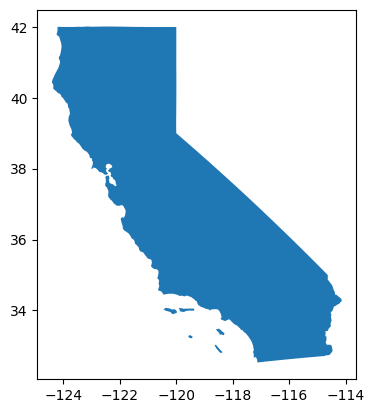

In [6]:
pop_states[pop_states.NAME == 'California'].plot()

In [7]:
usa_path = gplt.datasets.get_path("contiguous_usa")
usa_path

'https://raw.githubusercontent.com/ResidentMario/geoplot-data/master/contiguous-usa.geojson'

In [8]:
usa_polygon_data = gpd.read_file( usa_path )
# polygon_data

In [9]:
cities_path = gplt.datasets.get_path("usa_cities")
cities_path

'https://raw.githubusercontent.com/ResidentMario/geoplot-data/master/usa-cities.geojson'

In [10]:
cities_polygon_data = gpd.read_file( cities_path )
cities_polygon_data

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.00,1611.00,ND,POINT (-101.29627 48.23251)
1,101,52838.00,830.00,ND,POINT (-97.03285 47.92526)
2,153,15427.00,1407.00,ND,POINT (-98.70844 46.91054)
3,177,105549.00,902.00,ND,POINT (-96.7898 46.87719)
4,192,17787.00,2411.00,ND,POINT (-102.78962 46.87918)
...,...,...,...,...,...
3661,38128,2565635.00,49.00,NY,POINT (-73.94956 40.65009)
3662,38129,2272771.00,39.00,NY,POINT (-73.79745 40.75016)
3663,38130,470728.00,164.00,NY,POINT (-74.14981 40.58328)
3664,38138,28712.00,187.00,MA,POINT (-71.33303 41.98405)


<Axes: >

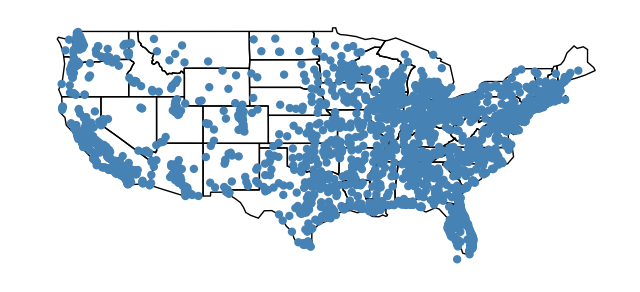

In [54]:
axis = gplt.polyplot( usa_polygon_data)
gplt.pointplot( cities_polygon_data.query('STATE not in ["HI","AK","PR"]'), ax = axis )

In [67]:
import xml.etree.ElementTree as ET

the_xml = ET.parse("tractive_export.xml")

In [70]:
root = the_xml.getroot()

In [71]:
root

<Element '{http://www.topografix.com/GPX/1/1}gpx' at 0x7904ec77ef70>

In [19]:
import xml.etree.ElementTree as ET

tree = ET.parse('tractive_export.xml')

root = tree.getroot()

In [20]:
root.tag, root.attrib

('{http://www.topografix.com/GPX/1/1}gpx',
 {'creator': 'Tractive GeoData Util',
  'version': '1.1',
  '{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd'})

In [25]:
root[1:]

[<Element '{http://www.topografix.com/GPX/1/1}trk' at 0x77845761d9e0>]

In [38]:
for child in root[1:]:
    for grandchild in child: #[1:]:
        for grandgrandch in grandchild:
            print(grandgrandch.tag, grandgrandch.attrib, grandgrandch)
            # print(neph.tag, neph.attrib)

{http://www.topografix.com/GPX/1/1}trkpt {'lat': '42.92895', 'lon': '11.644961'} <Element '{http://www.topografix.com/GPX/1/1}trkpt' at 0x77845761e520>
{http://www.topografix.com/GPX/1/1}trkpt {'lat': '42.92895', 'lon': '11.644961'} <Element '{http://www.topografix.com/GPX/1/1}trkpt' at 0x77845761dcb0>
{http://www.topografix.com/GPX/1/1}trkpt {'lat': '42.92895', 'lon': '11.644961'} <Element '{http://www.topografix.com/GPX/1/1}trkpt' at 0x77845761fb00>
{http://www.topografix.com/GPX/1/1}trkpt {'lat': '42.92895', 'lon': '11.644961'} <Element '{http://www.topografix.com/GPX/1/1}trkpt' at 0x77845761c3b0>
{http://www.topografix.com/GPX/1/1}trkpt {'lat': '42.92895', 'lon': '11.644961'} <Element '{http://www.topografix.com/GPX/1/1}trkpt' at 0x7784575d0f90>
{http://www.topografix.com/GPX/1/1}trkpt {'lat': '42.92895', 'lon': '11.644961'} <Element '{http://www.topografix.com/GPX/1/1}trkpt' at 0x7784575d0f40>
{http://www.topografix.com/GPX/1/1}trkpt {'lat': '42.92895', 'lon': '11.644961'} <Elemen

In [57]:
for i in root[1][1][1]:
    print(i.tag)

{http://www.topografix.com/GPX/1/1}ele
{http://www.topografix.com/GPX/1/1}time


In [80]:
#### BUONA
for i in root[1][1]:
    print(i.attrib, i[0].tag[-3:], i[0].text, i[1].tag[-4:], i[1].text)

{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T07:33:20Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T07:43:30Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T07:53:30Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T08:03:30Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T08:13:30Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T08:23:30Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T08:31:35Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T08:37:29Z
{'lat': '42.928749', 'lon': '11.64504'} ele 928 time 2024-07-25T08:41:15Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T08:43:18Z
{'lat': '42.929157', 'lon': '11.644991'} ele 960 time 2024-07-25T08:46:40Z
{'lat': '42.929076', 'lon': '11.644963'} ele 940 time 2024-07-25T08:49:09Z
{'lat': '42.92895', 'lon': '11.644961'} ele 930 time 2024-07-25T08:51:31Z
{'lat': '42.929078', 'lon': '11.6450